In [66]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import glob as gb
import cv2
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import glob as gb
import cv2
import os
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load Data****

In [68]:
trainpath = '/kaggle/input/seat-belt2/Seat_Belt2/'
testpath  = '/kaggle/input/seat-belt2/Seat_Belt2/'

In [69]:
for folder in  os.listdir(trainpath + 'Train') : 
    files = gb.glob(pathname= str( trainpath +'Train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 3700 in folder Seat_Belt
For training data , found 3317 in folder WithoutSeat_Belt


In [70]:
for folder in  os.listdir(trainpath + 'Test') : 
    files = gb.glob(pathname= str( trainpath +'Test//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 800 in folder Seat_Belt
For training data , found 669 in folder WithoutSeat_Belt


# PreProcessing****

In [71]:
code = {'Seat_Belt':0 ,'WithoutSeat_Belt':1}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [72]:
size = []
for folder in  os.listdir(trainpath +'Train') : 
    files = gb.glob(pathname= str( trainpath +'Train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(480, 640, 3)      3988
(1080, 1920, 3)     941
(408, 612, 3)       837
(464, 848, 3)       670
(1101, 1500, 3)      57
                   ... 
(945, 1500, 3)        1
(380, 612, 3)         1
(420, 612, 3)         1
(1086, 1500, 3)       1
(1185, 1500, 3)       1
Length: 106, dtype: int64

In [73]:
size = []
for folder in  os.listdir(trainpath +'Test') : 
    files = gb.glob(pathname= str( trainpath +'Test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(480, 640, 3)      800
(1080, 1920, 3)    266
(464, 848, 3)      189
(408, 612, 3)      112
(416, 416, 3)       53
(405, 612, 3)       11
(315, 474, 3)        6
(240, 360, 3)        5
(407, 612, 3)        5
(612, 410, 3)        4
(459, 612, 3)        4
(285, 390, 3)        4
(612, 438, 3)        3
(410, 612, 3)        3
(380, 612, 3)        2
(342, 474, 3)        1
(348, 474, 3)        1
dtype: int64

In [74]:
Size = 100
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'Train') : 
    files = gb.glob(pathname= str( trainpath +'Train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (Size ,Size))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [75]:
print(f'we have {len(X_train)} items in X_train')

we have 7017 items in X_train


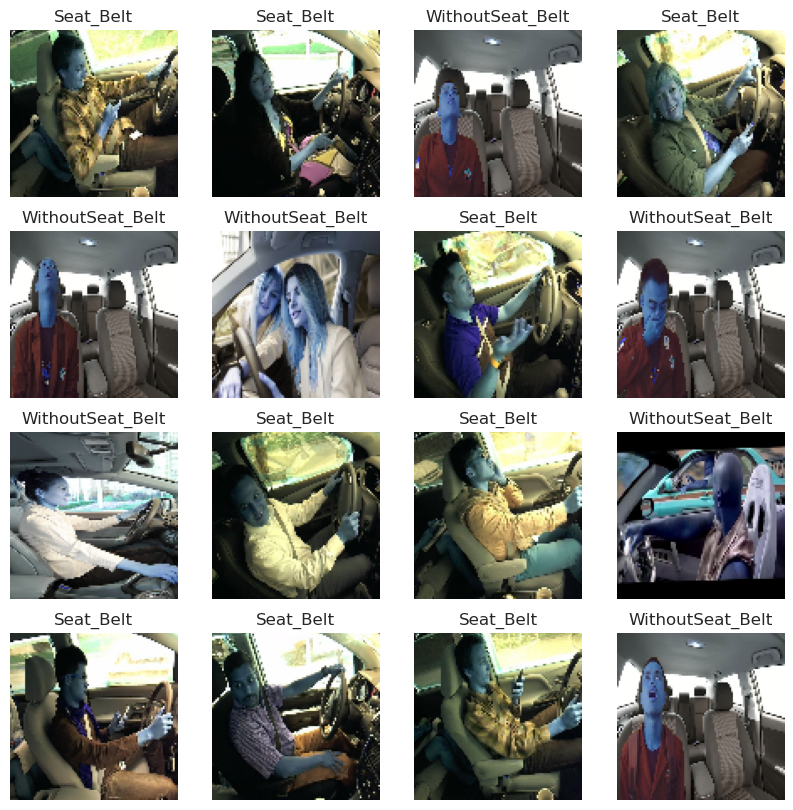

In [76]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_train),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [77]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'Test') : 
    files = gb.glob(pathname= str(testpath + 'Test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (Size,Size))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [78]:
print(f'we have {len(X_test)} items in X_test')

we have 1469 items in X_test


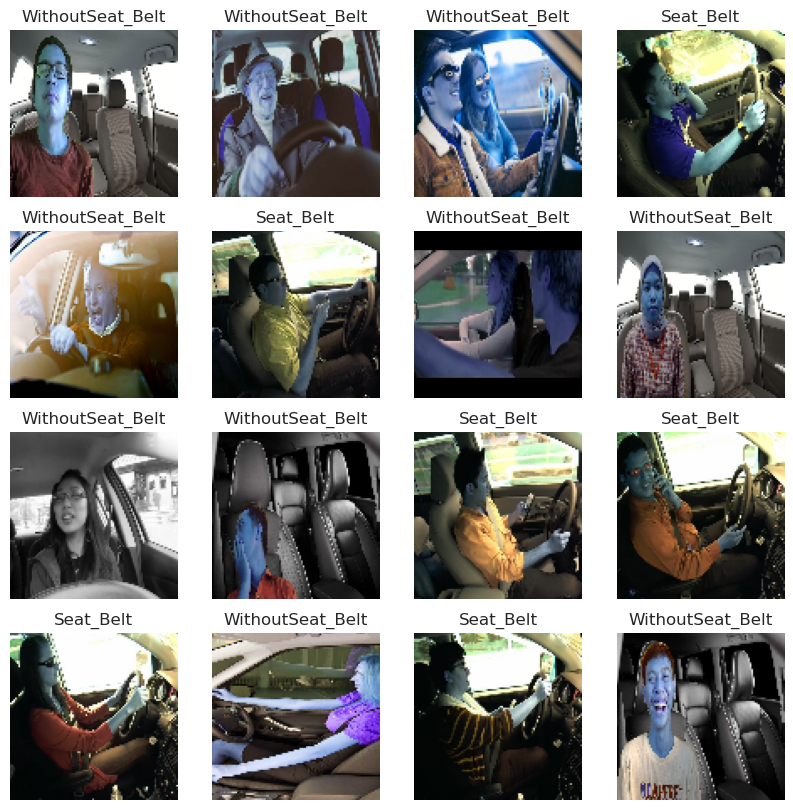

In [79]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_test),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [80]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')

print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (7017, 100, 100, 3)
X_test shape  is (1469, 100, 100, 3)
y_train shape  is (7017,)
y_test shape  is (1469,)


# CNN Model****

In [81]:

Mod = tf.keras.models.Sequential([

  layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(100,100,3)),
  layers.MaxPooling2D(pool_size=2),

  layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'),
  layers.MaxPooling2D(pool_size=2),
  layers.BatchNormalization(),
  layers.Dropout(0.5),

  layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=2),
  layers.BatchNormalization(),
  layers.Dropout(0.2),

  layers.Conv2D(filters=128,kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=2),
  layers.BatchNormalization(),
  layers.Dropout(0.25),

  layers.Flatten(),

  layers.Dense(units=128,activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.25),

  layers.Dense(units=6,activation='softmax')
])

In [82]:
Mod.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 49, 49, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                      

In [83]:
Mod.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training model ****

In [84]:
epochs = 50
ThisModel = Mod.fit(X_train, y_train, epochs=epochs,batch_size=128,verbose=1)

Epoch 1/50


2023-08-29 15:36:47.891106: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


55/55 [==============================] - 5s 19ms/step - loss: 0.1169 - accuracy: 0.9654
Epoch 2/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0085 - accuracy: 0.9987
Epoch 3/50
55/55 [==============================] - 1s 20ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 4/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 5/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 6/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 7/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 8/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 9/50
55/55 [==============================] - 1s 19ms/step - loss: 8.5466e-04 - accuracy: 0.9999
Epoch 10/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 11/50
55/5

# Accuracy ****

In [85]:
Mod.evaluate(X_test, y_test)

46/46 [==============================] - 0s 4ms/step - loss: 0.3821 - accuracy: 0.9374


[0.3820823132991791, 0.9373723864555359]

# Save Model ****

In [88]:
Mod.save('my_model.h5')

In [89]:
new_model = tf.keras.models.load_model('my_model.h5')

In [90]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 49, 49, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                      